<a href="https://colab.research.google.com/github/Shaan122/Artificial_intelegence_pert1/blob/main/rusandi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contoh Dataset:
    tahun       harga
0    2024  150.000000
1    2025  135.000000
2    2026  121.500000
3    2027  109.350000
4    2028   98.415000
5    2029   88.573500
6    2030   79.716150
7    2031   71.744535
8    2032   64.570082
9    2033   58.113073
10   2034   52.301766
11   2035   47.071589
12   2036   42.364430
13   2037   38.127987
14   2038   34.315189

Hasil Prediksi:
    Tahun  Harga Aktual  Harga Prediksi
9    2033     58.113073       63.615409
11   2035     47.071589       48.607258
0    2024    150.000000      131.152088

Mean Squared Error (MSE): 129.29258385955237
R-squared: 0.9392656081016106


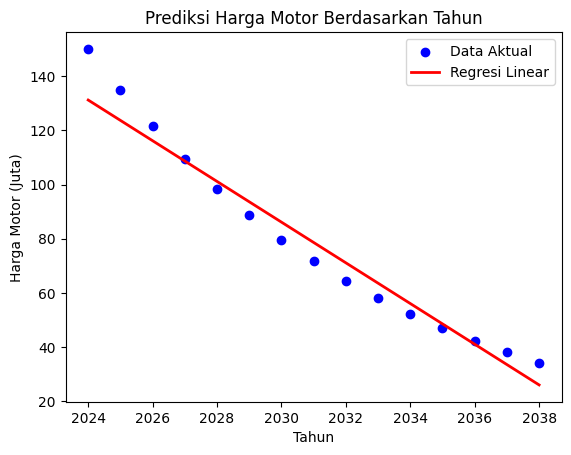

In [2]:
#nama : RUSANDI PRAMUJA
#nim  : 20220801180

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Buat Dataset Buatan
data_motor = {
    'tahun': np.arange(2024, 2039),  # Tahun 2024 - 2038
    'harga': [150 * (0.90 ** (t - 2024)) for t in np.arange(2024, 2039)]  # Harga turun 10% per tahun setelah 2024
}
df_motor = pd.DataFrame(data_motor)

print("Contoh Dataset:")
print(df_motor)

# 2. Persiapkan Data untuk Model
X_motor = df_motor[['tahun']]  # Fitur: Tahun
y_motor = df_motor['harga']  # Target: Harga motor (dalam juta)

# Split data menjadi training dan testing
X_train_motor, X_test_motor, y_train_motor, y_test_motor = train_test_split(X_motor, y_motor, test_size=0.2, random_state=42)

# 3. Training Model Linear Regression
model_motor = LinearRegression()
model_motor.fit(X_train_motor, y_train_motor)

# 4. Prediksi dan Evaluasi
y_pred_motor = model_motor.predict(X_test_motor)

print("\nHasil Prediksi:")
print(pd.DataFrame({'Tahun': X_test_motor['tahun'], 'Harga Aktual': y_test_motor, 'Harga Prediksi': y_pred_motor}))

# Hitung Mean Squared Error (MSE) dan R-squared
mse_motor = mean_squared_error(y_test_motor, y_pred_motor)
r2_motor = r2_score(y_test_motor, y_pred_motor)

print(f"\nMean Squared Error (MSE): {mse_motor}")
print(f"R-squared: {r2_motor}")

# 5. Visualisasi Hasil
plt.scatter(X_motor, y_motor, color='blue', label='Data Aktual')
plt.plot(X_motor, model_motor.predict(X_motor), color='red', linewidth=2, label='Regresi Linear')
plt.xlabel('Tahun')
plt.ylabel('Harga Motor (Juta)')
plt.title('Prediksi Harga Motor Berdasarkan Tahun')
plt.legend()
plt.show()